In [26]:
import numpy as np
import scipy as sp
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid',{'grid.linestyle': '--', 'grid.color': '0.9', 'axes.edgecolor': '0.3'})
sns.set_context('poster')

In [3]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid',{'grid.linestyle': '--', 'grid.color': '0.9', 'axes.edgecolor': '0.3'})
sns.set_context('poster')

In [4]:
np.arange(-5,5,1)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [5]:
class Galton():
    def __init__(self, peg_rows):
        
        # peg_rows - number of rows on the board
        self.peg_rows = peg_rows
        
        # peg_number - total number of pegs on the board
        self.peg_number = sum([i for i in
                               range(1,peg_rows+1)])
        
        # bin_number - number of bins to collect balls
        self.bin_number = peg_rows + 1
        
        # bins - array of the bottom row bins
        self.bins = np.arange(-peg_rows/2, peg_rows/2+1,
                              dtype=np.float)
            
        # p, n - parameters of the binomial
        #        probability mass function (pmf)
        self.p = 0.5
        self.n = peg_rows
        
        # mean, std - mean, standard deviation of pmf
        self.mean = self.n*self.p
        self.std = (self.mean*(1-self.p))**(0.5)
    
    def drop_balls(self, samples):
        # rv - random binomial variate array
        self.samples = samples
        rv = np.random.binomial(n=self.peg_rows, p=0.5,
                                size=samples)
        rv = rv - self.peg_rows/2
        return rv

In [6]:
# set up an experiment 'ex'
ex = Galton(peg_rows=91)

print('Our Galton board has {} rows of pegs and {} total pegs.'
      .format(ex.peg_rows, ex.peg_number))

# drop a given number of balls
rv = ex.drop_balls(samples=1000)

print('We just dropped {} balls.'.format(ex.samples))

Our Galton board has 91 rows of pegs and 4186 total pegs.
We just dropped 1000 balls.


In [7]:
def plot_experiment(ex, rv, log=False, legend=True, pmf=True):
    # plot the result
    bin_width = 0.3
    bins = list(ex.bins - bin_width/2,)
    plt.hist(rv, bins = bins + [bins[-1] + 1],
             width=bin_width, normed=True,
             log=log, label='Random drops',
             zorder=2) # zorder sets which plot is on top
    print(ex.bins-bin_width/2)

    if pmf:
        # plot the average result of an infinite
        # number of ball drops (normed)
        if ex.peg_rows%2 == 0:
            x = ex.bins
        else:
            # need integers for discrete pmf
            # therefore we will offset the current bins
            x = [i+0.5 for i in ex.bins]
        pmf = [sp.stats.binom.pmf(k+int(ex.mean), n=ex.n, p=ex.p)
               for k in x]
        plt.bar(ex.bins, pmf, width=0.7, alpha=0.5,
                color='orange', align='center',
                log=log, label='Binomial pmf',
                zorder=1)

    # plot the corresponding continuous distribution
    x = np.arange(min(ex.bins), max(ex.bins), 0.1)
    pmf = [sp.stats.norm.pdf(x=k, loc=0, scale=ex.std)
           for k in x]
    if not(log):
        plt.plot(x, pmf, alpha=0.5, color='r', lw=5,
                 label='Gaussian pdf')
    
    title = "Galton's board experiment with {0} rows of pegs and {1} samples"
    plt.title(title.format(ex.peg_rows, ex.samples),
              y=1.03, fontsize=20)
    plt.xlabel('Bins', labelpad=15)
    plt.ylabel('Normalized frequency', labelpad=15)
    if legend:
        plt.legend()
    plt.xlim(min(ex.bins)-2*log, max(ex.bins)+2*log)

/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[-45.65 -44.65 -43.65 -42.65 -41.65 -40.65 -39.65 -38.65 -37.65 -36.65
 -35.65 -34.65 -33.65 -32.65 -31.65 -30.65 -29.65 -28.65 -27.65 -26.65
 -25.65 -24.65 -23.65 -22.65 -21.65 -20.65 -19.65 -18.65 -17.65 -16.65
 -15.65 -14.65 -13.65 -12.65 -11.65 -10.65  -9.65  -8.65  -7.65  -6.65
  -5.65  -4.65  -3.65  -2.65  -1.65  -0.65   0.35   1.35   2.35   3.35
   4.35   5.35   6.35   7.35   8.35   9.35  10.35  11.35  12.35  13.35
  14.35  15.35  16.35  17.35  18.35  19.35  20.35  21.35  22.35  23.35
  24.35  25.35  26.35  27.35  28.35  29.35  30.35  31.35  32.35  33.35
  34.35  35.35  36.35  37.35  38.35  39.35  40.35  41.35  42.35  43.35
  44.35  45.35]


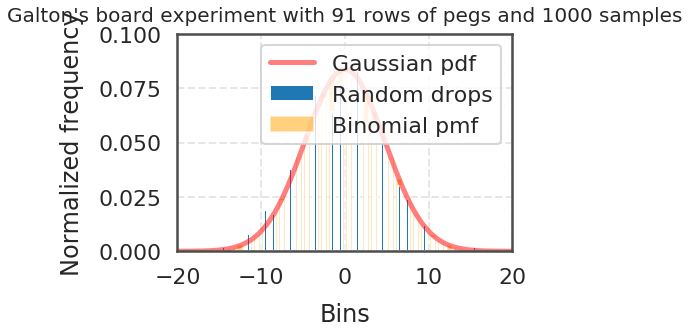

In [8]:
plot_experiment(ex, rv, log=False)
plt.ylim(0, 0.1)
plt.xlim(-20, 20)
plt.savefig('91_rows_1000_samples.png', bbox_inches='tight', dpi=144)

[ 0.  1.  1.  1. -1.  0.  0.  1.  0.  1. -1.  0.  0.  1.  1.  1.  1.  0.
  0. -1. -1. -1. -1.  1.  0.  0.  0.  0.  0.  0. -1.  1. -1.  0.  0.  0.
  1.  0.  0.  0.  0.  1.  0. -1.  1.  1. -1.  0.  0.  1. -1.  0. -1.  1.
  0. -1.  1.  0.  0. -1.  1.  1. -1.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  0. -1.  1. -1.  0.  1.  1.  0.  0.  0. -1.  1.  0. -1.  0.  0.  0.  0.
 -1.  0.  0.  1.  0.  0.  1. -1.  1.  0.]
[-1.15 -0.15  0.85]
[-1.  0.  1.]


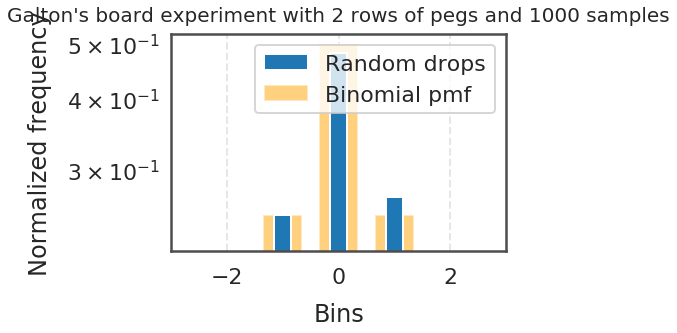

In [9]:
ex = Galton(peg_rows = 2)
rv = ex.drop_balls(samples = 1000)
print(rv[:100])
plot_experiment(ex, rv, log=True)
print(ex.bins)

[-6.15 -5.15 -4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85  4.85
  5.85]
[-6.15 -5.15 -4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85  4.85
  5.85]
[-6.15 -5.15 -4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85  4.85
  5.85]
[-6.15 -5.15 -4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85  4.85
  5.85]
[-6.15 -5.15 -4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85  4.85
  5.85]
[-6.15 -5.15 -4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85  4.85
  5.85]
[-6.15 -5.15 -4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85  4.85
  5.85]
[-6.15 -5.15 -4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85  4.85
  5.85]


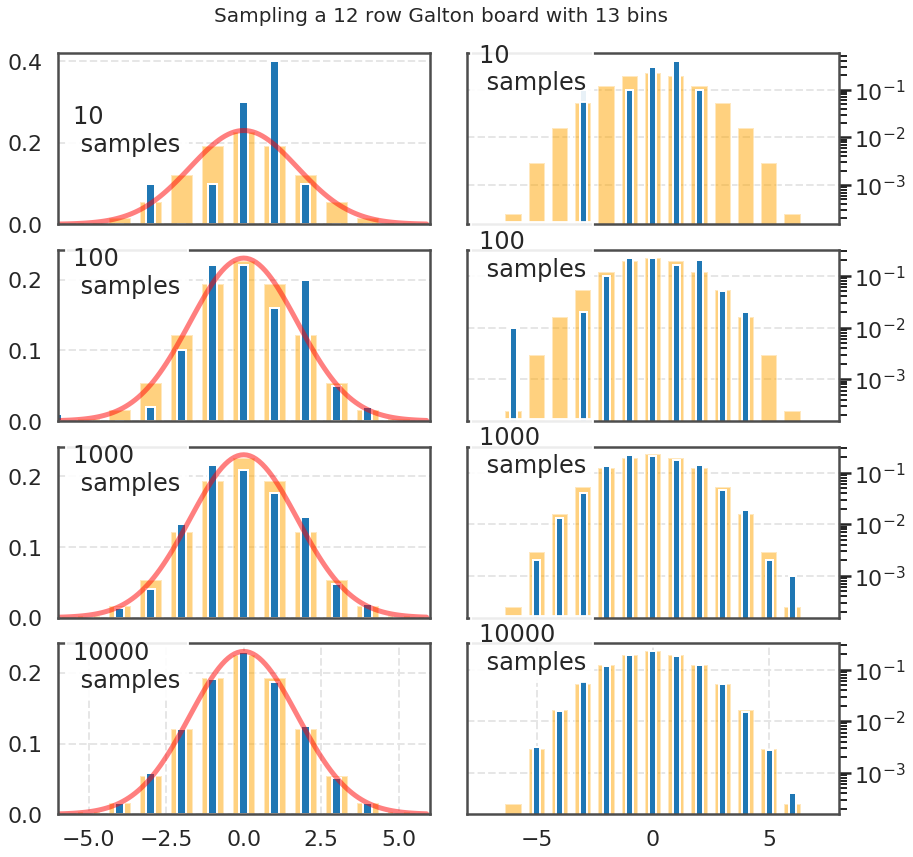

In [10]:
ex = Galton(peg_rows=12)

samples = [10, 100, 1000, 10000]
order = [1, 3, 5, 7]

box = dict(boxstyle='square', color='white', alpha=0.9)

def plot_subplot(log):
    plot_number = order[i]
    if log:
        plot_number = order[i]+1
    subplot_string = str(rows) \
                     + str(columns) \
                     + str(plot_number)
    ax = plt.subplot(subplot_string)
    plot_experiment(ex, rv, log=log, legend=False)
    if log:
        plt.text(-7.5, 0.1,
                 '{} \n samples'.format(sample_size),
                 bbox=box)
        ax.yaxis.tick_right()
    else:
        plt.text(-5.5, 0.18,
                 '{} \n samples'.format(sample_size),
                 bbox=box)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('')

plt.figure(figsize=(14,14))
rows = len(samples)
columns = 2
for i, sample_size in enumerate(samples):
    rv = ex.drop_balls(samples=sample_size)
    plot_subplot(log=False)
    if i != 3:
        plt.xticks([])
    plot_subplot(log=True)
    if i != 3:  
        plt.xticks([])
        
        
plt.subplots_adjust(hspace=0.15)
plt.subplots_adjust(wspace=0.1)
plt.title('Sampling a {} row Galton board with {} bins'.format(ex.peg_rows, ex.bin_number),
          x=-0.07, y=rows+0.60, fontsize=20)
plt.savefig('sampling_12_row_board.png', bbox_inches='tight', dpi=144)

[-4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35  2.35  3.35  4.35]
[-4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35  2.35  3.35  4.35]
[-4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35  2.35  3.35  4.35]
[-4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35  2.35  3.35  4.35]
[-24.65 -23.65 -22.65 -21.65 -20.65 -19.65 -18.65 -17.65 -16.65 -15.65
 -14.65 -13.65 -12.65 -11.65 -10.65  -9.65  -8.65  -7.65  -6.65  -5.65
  -4.65  -3.65  -2.65  -1.65  -0.65   0.35   1.35   2.35   3.35   4.35
   5.35   6.35   7.35   8.35   9.35  10.35  11.35  12.35  13.35  14.35
  15.35  16.35  17.35  18.35  19.35  20.35  21.35  22.35  23.35  24.35]
[-24.65 -23.65 -22.65 -21.65 -20.65 -19.65 -18.65 -17.65 -16.65 -15.65
 -14.65 -13.65 -12.65 -11.65 -10.65  -9.65  -8.65  -7.65  -6.65  -5.65
  -4.65  -3.65  -2.65  -1.65  -0.65   0.35   1.35   2.35   3.35   4.35
   5.35   6.35   7.35   8.35   9.35  10.35  11.35  12.35  13.35  14.35
  15.35  16.35  17.35  18.35  19.35  20.35  21.35  22.35  23.35  24.35]
[-24.65 -23.65 -22.65 -21.65 -20.65 -19.

[-99.65 -98.65 -97.65 -96.65 -95.65 -94.65 -93.65 -92.65 -91.65 -90.65
 -89.65 -88.65 -87.65 -86.65 -85.65 -84.65 -83.65 -82.65 -81.65 -80.65
 -79.65 -78.65 -77.65 -76.65 -75.65 -74.65 -73.65 -72.65 -71.65 -70.65
 -69.65 -68.65 -67.65 -66.65 -65.65 -64.65 -63.65 -62.65 -61.65 -60.65
 -59.65 -58.65 -57.65 -56.65 -55.65 -54.65 -53.65 -52.65 -51.65 -50.65
 -49.65 -48.65 -47.65 -46.65 -45.65 -44.65 -43.65 -42.65 -41.65 -40.65
 -39.65 -38.65 -37.65 -36.65 -35.65 -34.65 -33.65 -32.65 -31.65 -30.65
 -29.65 -28.65 -27.65 -26.65 -25.65 -24.65 -23.65 -22.65 -21.65 -20.65
 -19.65 -18.65 -17.65 -16.65 -15.65 -14.65 -13.65 -12.65 -11.65 -10.65
  -9.65  -8.65  -7.65  -6.65  -5.65  -4.65  -3.65  -2.65  -1.65  -0.65
   0.35   1.35   2.35   3.35   4.35   5.35   6.35   7.35   8.35   9.35
  10.35  11.35  12.35  13.35  14.35  15.35  16.35  17.35  18.35  19.35
  20.35  21.35  22.35  23.35  24.35  25.35  26.35  27.35  28.35  29.35
  30.35  31.35  32.35  33.35  34.35  35.35  36.35  37.35  38.35  39.35
  40.3

/srv/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


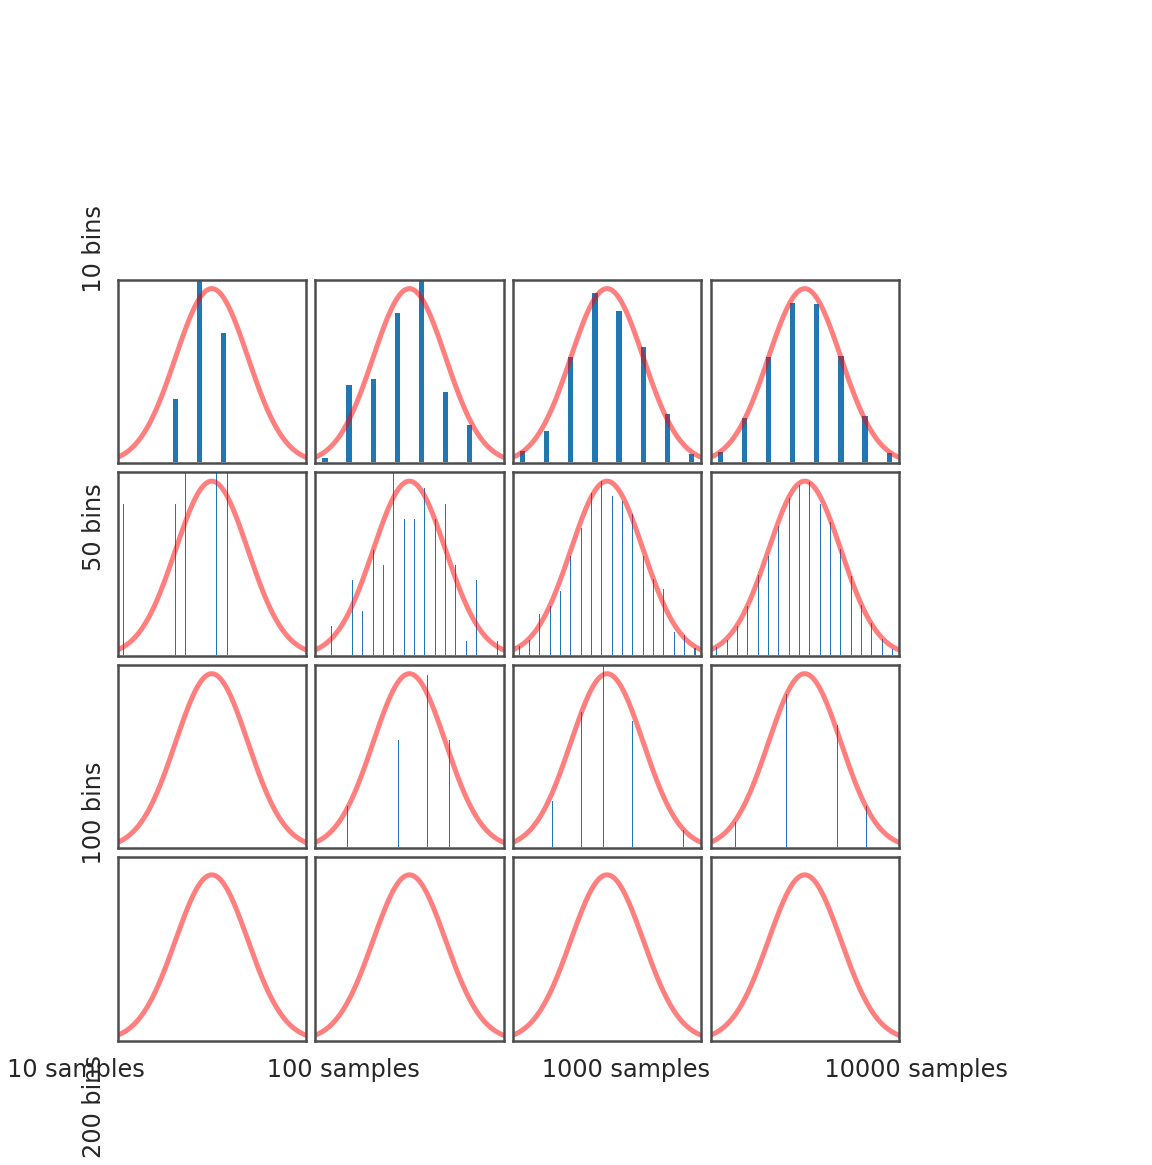

In [12]:
samples = [10, 100, 1000, 10000]
peg_rows = [9, 49, 99, 199]

box = dict(boxstyle='square', color='white', alpha=0.9)

plot_rows = len(samples)
plot_columns = len(peg_rows)

fig = plt.figure(figsize=(14,14))

i = 0
for peg_row_number in peg_rows:
    ex = Galton(peg_rows=peg_row_number)
    for sample_size in samples:
        i += 1
        rv = ex.drop_balls(samples=sample_size)
        plt.subplot(plot_rows, plot_columns, i)
        plot_experiment(ex, rv, log=False,
                        legend=False, pmf=False)
        # this seems to be a good way to get
        # uniform looking plot limits
        plt.xlim(-1.3*(ex.peg_rows)**(0.5),
                 1.3*(ex.peg_rows)**(0.5))
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('')
        plt.ylabel('')
        plt.title('')

i = plot_rows*plot_columns
for _ in range(plot_rows):
    j = 0
    for _ in range(plot_columns):
        ax = plt.subplot(4,4,i)
        if j == 0:
            ylim = ax.get_ylim()
        if j > 0:
            ax.set_ylim(ylim)
        j += 1
        i -= 1
        
plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.05)

# the labels are done manually
fig.text(0.58, 0.09, '{} samples                {} samples                {} samples               {} samples                  '.format(
        samples[0], samples[1], samples[2], samples[3]), ha='center')
fig.text(0.09, 0.58, '{} bins                         {} bins                         {} bins                         {} bins                          '.format(
        peg_rows[3]+1, peg_rows[2]+1, peg_rows[1]+1, peg_rows[0]+1), va='center', rotation='vertical')

plt.savefig('bins_vs_samples.png', bbox_inches='tight', dpi=144)

[-4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35  2.35  3.35  4.35]
[-4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35  2.35  3.35  4.35]
[-4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35  2.35  3.35  4.35]
[-4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35  2.35  3.35  4.35]
[-9.65 -8.65 -7.65 -6.65 -5.65 -4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35
  2.35  3.35  4.35  5.35  6.35  7.35  8.35  9.35]
[-9.65 -8.65 -7.65 -6.65 -5.65 -4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35
  2.35  3.35  4.35  5.35  6.35  7.35  8.35  9.35]
[-9.65 -8.65 -7.65 -6.65 -5.65 -4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35
  2.35  3.35  4.35  5.35  6.35  7.35  8.35  9.35]
[-9.65 -8.65 -7.65 -6.65 -5.65 -4.65 -3.65 -2.65 -1.65 -0.65  0.35  1.35
  2.35  3.35  4.35  5.35  6.35  7.35  8.35  9.35]
[-14.65 -13.65 -12.65 -11.65 -10.65  -9.65  -8.65  -7.65  -6.65  -5.65
  -4.65  -3.65  -2.65  -1.65  -0.65   0.35   1.35   2.35   3.35   4.35
   5.35   6.35   7.35   8.35   9.35  10.35  11.35  12.35  13.35  14.35]
[-14.65 -13.65 -12.65 -11.65 -10.65  -9.65  -8

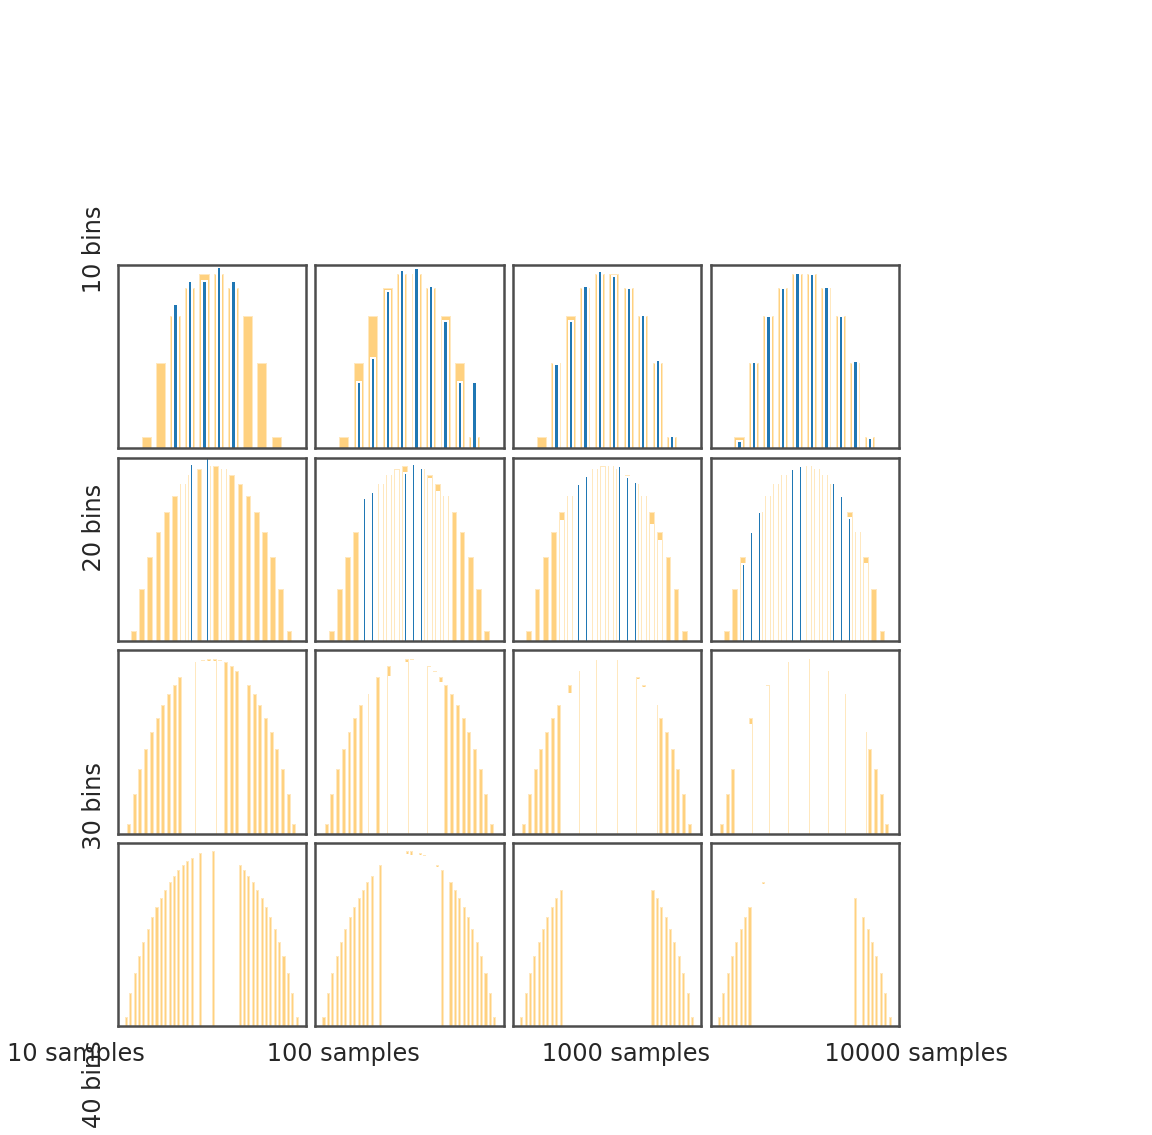

In [13]:
samples = [10, 100, 1000, 10000]
peg_rows = [9, 19, 29, 39]

box = dict(boxstyle='square', color='white', alpha=0.9)

plot_rows = len(samples)
plot_columns = len(peg_rows)

fig = plt.figure(figsize=(14,14))

i = 0
for peg_row_number in peg_rows:
    ex = Galton(peg_rows=peg_row_number)
    for sample_size in samples:
        i += 1
        rv = ex.drop_balls(samples=sample_size)
        plt.subplot(plot_rows, plot_columns, i)
        plot_experiment(ex, rv, log=True, legend=False)
        #plt.xlim(-ex.peg_rows/3, ex.peg_rows/3)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('')
        plt.ylabel('')
        plt.title('')

i = plot_rows*plot_columns
for _ in range(plot_rows):
    j = 0
    for _ in range(plot_columns):
        ax = plt.subplot(4,4,i)
        if j == 0:
            ylim = ax.get_ylim()
        if j > 0:
            ax.set_ylim(ylim)
        j += 1
        i -= 1

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.05)

# the labels are done manually
fig.text(0.58, 0.09, '{} samples                {} samples                {} samples               {} samples                  '.format(
        samples[0], samples[1], samples[2], samples[3]), ha='center')
fig.text(0.09, 0.58, '{} bins                         {} bins                         {} bins                         {} bins                          '.format(
        peg_rows[3]+1, peg_rows[2]+1, peg_rows[1]+1, peg_rows[0]+1), va='center', rotation='vertical')

plt.savefig('bins_vs_samples_log.png', bbox_inches='tight', dpi=144)

In [14]:
a=[1,2,3,4]
for i, aa in enumerate(a):
    print(i, aa)

0 1
1 2
2 3
3 4


In [15]:
a, b = 4, 4
a*b

16

[-50.15 -49.15 -48.15 -47.15 -46.15 -45.15 -44.15 -43.15 -42.15 -41.15
 -40.15 -39.15 -38.15 -37.15 -36.15 -35.15 -34.15 -33.15 -32.15 -31.15
 -30.15 -29.15 -28.15 -27.15 -26.15 -25.15 -24.15 -23.15 -22.15 -21.15
 -20.15 -19.15 -18.15 -17.15 -16.15 -15.15 -14.15 -13.15 -12.15 -11.15
 -10.15  -9.15  -8.15  -7.15  -6.15  -5.15  -4.15  -3.15  -2.15  -1.15
  -0.15   0.85   1.85   2.85   3.85   4.85   5.85   6.85   7.85   8.85
   9.85  10.85  11.85  12.85  13.85  14.85  15.85  16.85  17.85  18.85
  19.85  20.85  21.85  22.85  23.85  24.85  25.85  26.85  27.85  28.85
  29.85  30.85  31.85  32.85  33.85  34.85  35.85  36.85  37.85  38.85
  39.85  40.85  41.85  42.85  43.85  44.85  45.85  46.85  47.85  48.85
  49.85]
[-50.15 -49.15 -48.15 -47.15 -46.15 -45.15 -44.15 -43.15 -42.15 -41.15
 -40.15 -39.15 -38.15 -37.15 -36.15 -35.15 -34.15 -33.15 -32.15 -31.15
 -30.15 -29.15 -28.15 -27.15 -26.15 -25.15 -24.15 -23.15 -22.15 -21.15
 -20.15 -19.15 -18.15 -17.15 -16.15 -15.15 -14.15 -13.15 -12.15 -11.

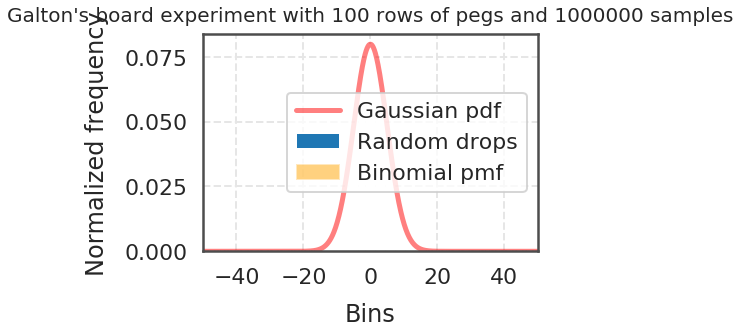

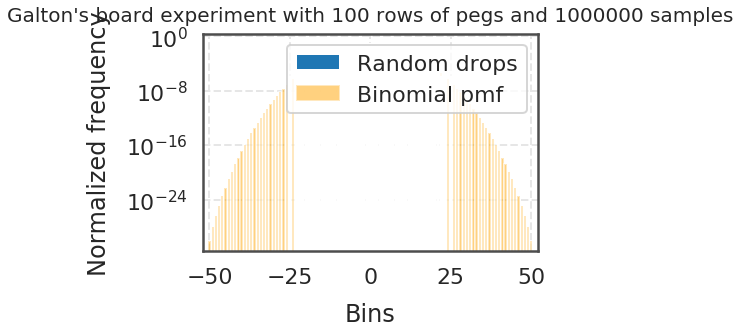

In [16]:
ex = Galton(peg_rows=100)
rv = ex.drop_balls(samples=1000000)

plot_experiment(ex, rv, log=False)
plt.figure()
plot_experiment(ex, rv, log=True)

In [17]:
class Galton():
    def __init__(self, peg_rows):
        
        # peg_rows - number of rows on the board
        self.peg_rows = peg_rows
        
        # peg_number - total number of pegs on the board
        self.peg_number = sum([i for i in
                               range(1,peg_rows+1)])
        
        # bin_number - number of bins to collect balls
        self.bin_number = peg_rows + 1
        
        # bins - array of the bottom row bins
        self.bins = np.arange(-peg_rows/2, peg_rows/2+1,
                              dtype=np.float)
            
        # p, n - parameters of the binomial
        #        probability mass function (pmf)
        self.p = 0.5
        self.n = peg_rows
        
        # mean, std - mean, standard deviation of pmf
        self.mean = self.n*self.p
        self.std = (self.mean*(1-self.p))**(0.5)
    
    def drop_balls(self, samples):
        # rv - random binomial variate array
        self.samples = samples
        rv = np.random.binomial(n=self.peg_rows, p=0.5,
                                size=samples)
        rv = rv - self.peg_rows/2
        return rv

In [18]:
# set up an experiment 'ex'
ex = Galton(peg_rows=3)

print('Our Galton board has {} rows of pegs and {} total pegs.'
      .format(ex.peg_rows, ex.peg_number))

# drop a given number of balls
rv = ex.drop_balls(samples=100)

print('We just dropped {} balls.'.format(ex.samples))

Our Galton board has 3 rows of pegs and 6 total pegs.
We just dropped 100 balls.


In [20]:
np.random.binomial(n=2, p=0.1, size=10)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [21]:
def random_samples(size):
    ''' Return a list of random variates distributed
        according to the log-normal distribution.'''
    # define parameters of our log-normal distribution
    sig, mu = 1, 3
    rv = np.random.lognormal(mean=mu, sigma=sig, size=size)
    return rv

N = 1000000
mean_sizes_m = [1, 10, 100]

rv = random_samples(N)
rv_split = [[rv[i:i+m] for i in range(0, len(rv), m)]
            for m in mean_sizes_m]
sample_means = [[s.mean() for s in samples]
                for samples in rv_split]

In [22]:
print([len(s) for s in sample_means])

[1000000, 100000, 10000]


In [23]:
print([sum(s)/len(s) for s in sample_means])

[33.13783855306112, 33.13783855305954, 33.137838553059545]


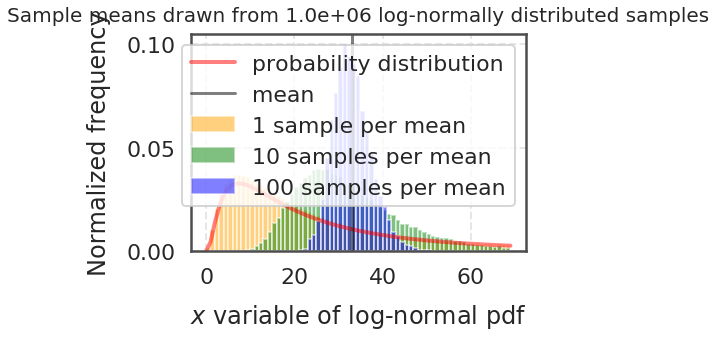

In [25]:
x = np.arange(0,70,1)
colors = ['orange', 'g', 'b']

# plot the histograms
for i, set_of_sample_means in enumerate(sample_means):
    if mean_sizes_m[i] == 1:
        lab = '{} sample per mean'.format(mean_sizes_m[i])
    else:
        lab = '{} samples per mean'.format(mean_sizes_m[i])
    plt.hist(set_of_sample_means, bins=x,
             normed=True, alpha=0.5,
             color=colors[i],
             label=lab)

# define parameters of our log-normal distribution
sig, mu = 1, 3
    
# plot our distribution
lognorm_pdf = [sp.stats.lognorm.pdf(x=i, s=sig, scale=np.exp(mu))
               for i in x]
plt.plot(x, lognorm_pdf, lw=4, c='r', alpha=0.5,
         label='probability distribution')

# plot the mean of the distribution,
plt.axvline(np.exp(mu + 0.5*sig**2), 0, 1,
            color='black', alpha=0.5, label='mean')


plt.title('Sample means drawn from {0:.1e} log-normally distributed samples'
          .format(N), y=1.03, fontsize=20)
plt.ylabel('Normalized frequency', labelpad=15)
plt.xlabel('$x$ variable of log-normal pdf', labelpad=15)

plt.legend()
plt.savefig('log_normal_central_limit_theroem.png', bbox_inches='tight', dpi=170)